In [1]:
import os
import json
import eval_milsed
import matplotlib.pyplot as plt
MODEL_PATH = '/beegfs/ci411/pcen/models/'

Using TensorFlow backend.


In [2]:
models = os.listdir(MODEL_PATH)
results = {}
for model in models:
    path = os.path.join(MODEL_PATH, model)
    if os.path.isdir(path):
        try:
            with open(os.path.join(path, 'results.json'), 'r') as fd:
                result = json.load(fd)
            results[model] = result
        except FileNotFoundError:
            print("No results.json file for model '{}'".format(model))
            results[model] = None


No results.json file for model 'model_test'


In [3]:
model_list = list(results.keys())
model_list.sort()

In [4]:
print(model_list)

['full_test', 'model00', 'model135', 'model13579', 'model_single_0', 'model_single_1', 'model_single_2', 'model_single_3', 'model_single_4', 'model_single_5', 'model_single_6', 'model_single_7', 'model_single_8', 'model_single_9', 'model_stack_0', 'model_stack_1', 'model_stack_2', 'model_stack_3', 'model_stack_4', 'model_stack_5', 'model_stack_6', 'model_stack_7', 'model_stack_8', 'model_stack_9', 'model_test']


In [5]:
single_stack_models = model_list[4:-1]

In [6]:
eval_milsed.compare_results(MODEL_PATH, single_stack_models)

,version,model,n_weights,s_f1,s_p,s_r,s_e
0,model_single_0,cnn_l3_strong,561150,0.511399,0.544895,0.481783,0.677934
1,model_single_1,cnn_l3_strong,561150,0.510058,0.569442,0.461891,0.653861
2,model_single_2,cnn_l3_strong,561150,0.518648,0.562211,0.481351,0.674511
3,model_single_3,cnn_l3_strong,561150,0.50433,0.520705,0.488955,0.698187
4,model_single_4,cnn_l3_strong,561150,0.489462,0.56991,0.428916,0.699989
5,model_single_5,cnn_l3_strong,561150,0.473354,0.570275,0.404591,0.700097
6,model_single_6,cnn_l3_strong,561150,0.428887,0.450954,0.40888,0.849328
7,model_single_7,cnn_l3_strong,561150,0.489311,0.580808,0.422718,0.691124
8,model_single_8,cnn_l3_strong,561150,0.398217,0.385282,0.412051,0.900429
9,model_single_9,cnn_l3_strong,561150,0.342584,0.297408,0.403942,1.14674


In [7]:
results_df = eval_milsed.compare_results(MODEL_PATH, single_stack_models)

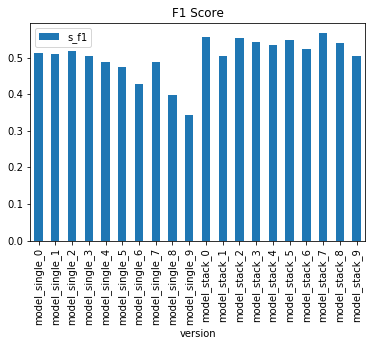

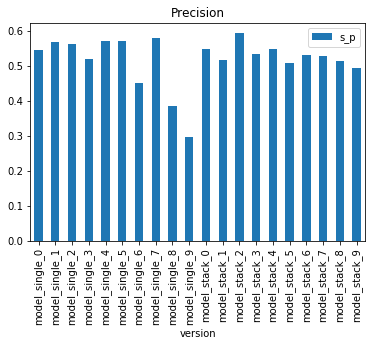

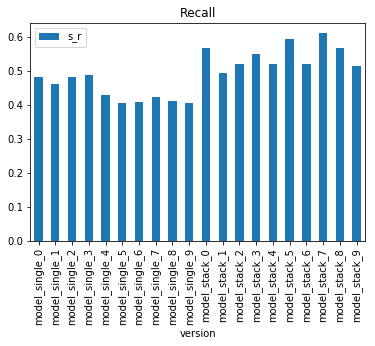

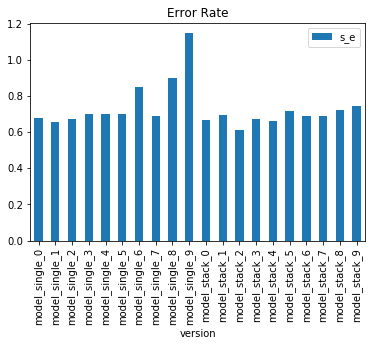

In [12]:
results_df.plot.bar(x='version', y='s_f1', title='F1 Score')
results_df.plot.bar(x='version', y='s_p', title='Precision')
results_df.plot.bar(x='version', y='s_r', title='Recall')
results_df.plot.bar(x='version', y='s_e', title='Error Rate')
plt.show()